## EDA of Melanoma Datasets

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Paired")

### Dataset 1: [Skin Cancer: Malignant vs. Benign](https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign)

In [2]:
directory = '../../data/'
os.listdir(path=directory)

['test', 'train']

In [3]:
for dirpath, dirnames, filenames in os.walk(directory):
    print(f'directory path: {dirpath}\
    \ndirectory name: {dirnames}\
    \nNumber of files: {len(filenames)}\
    \n-------\n')

directory path: ../../data/    
directory name: ['test', 'train']    
Number of files: 0    
-------

directory path: ../../data/test    
directory name: ['malignant', 'benign']    
Number of files: 0    
-------

directory path: ../../data/test/malignant    
directory name: []    
Number of files: 300    
-------

directory path: ../../data/test/benign    
directory name: []    
Number of files: 360    
-------

directory path: ../../data/train    
directory name: ['malignant', 'benign']    
Number of files: 0    
-------

directory path: ../../data/train/malignant    
directory name: []    
Number of files: 1197    
-------

directory path: ../../data/train/benign    
directory name: []    
Number of files: 1440    
-------



In [4]:
df = pd.DataFrame({
    'state': ['malignant', 'benign', 'malignant', 'benign'],
    'count': [1197, 1140, 300, 360],
    'directory': ['train', 'train', 'test', 'test']
})
df

,state,count,directory
0,malignant,1197,train
1,benign,1140,train
2,malignant,300,test
3,benign,360,test


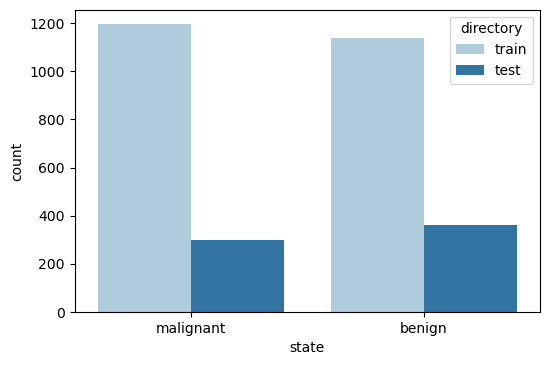

In [5]:
plt.figure(dpi=100)
sns.barplot(data=df, x='state', y='count', hue='directory')
plt.show()

### Dataset 2: [Skin Cancer MNIST - HAM10000](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000)
Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: 
1. Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
2. basal cell carcinoma (bcc)
3. benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), 
4. dermatofibroma (df)
5. melanoma (mel)
6. melanocytic nevi (nv) 
7. vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)

More than __50% of lesions are confirmed through histopathology (histo)__, the ground truth for the rest of the cases is __either follow-up examination (followup)__, __expert consensus (consensus)__, or confirmation by __in-vivo confocal microscopy (confocal)__. The dataset includes lesions with multiple images, which can be tracked by the lesionid-column within the HAM10000_metadata file.

The test set is not public, but the evaluation server remains running (see the challenge website). Any publications written using the HAM10000 data should be evaluated on the official test set hosted there, so that methods can be fairly compared.

In [6]:
directory = '../../archive/'
os.listdir(path=directory)

['hmnist_28_28_L.csv',
 '.DS_Store',
 'hmnist_28_28_RGB.csv',
 'HAM10000_images_part_1',
 'hmnist_8_8_RGB.csv',
 'hmnist_8_8_L.csv',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv']

#### hmnist_28_28_RGB.csv

In [7]:
df_28 = pd.read_csv('../../archive/hmnist_28_28_RGB.csv')
df_28

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


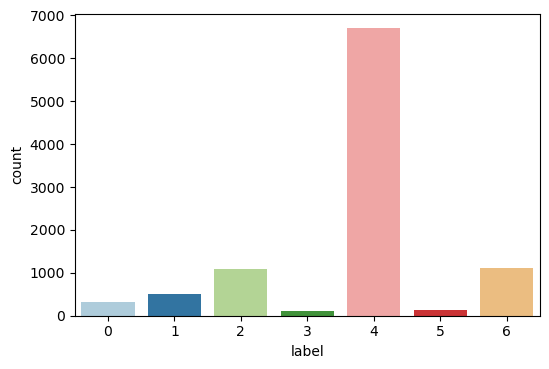

In [8]:
plt.figure(dpi=100)
sns.countplot(data=df_28, x='label')
plt.show()

In [9]:
df_28['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

__number 4__ seems to be the most common type of skin cancer in the datasets.

#### Metadata

In [10]:
df = pd.read_csv('../../archive/HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


##### dx

In [11]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

Well, it's clear that __number 4__ was actually __melanocytic nevi (nv)__.

In [12]:
disease_labels = pd.DataFrame({
    'disease_name': df['dx'].value_counts().index.to_list(),
    'label': df_28['label'].value_counts().index.to_list()
})
disease_labels = disease_labels.sort_values(by='label')
disease_labels

,disease_name,label
4,akiec,0
3,bcc,1
2,bkl,2
6,df,3
0,nv,4
5,vasc,5
1,mel,6


##### Localization

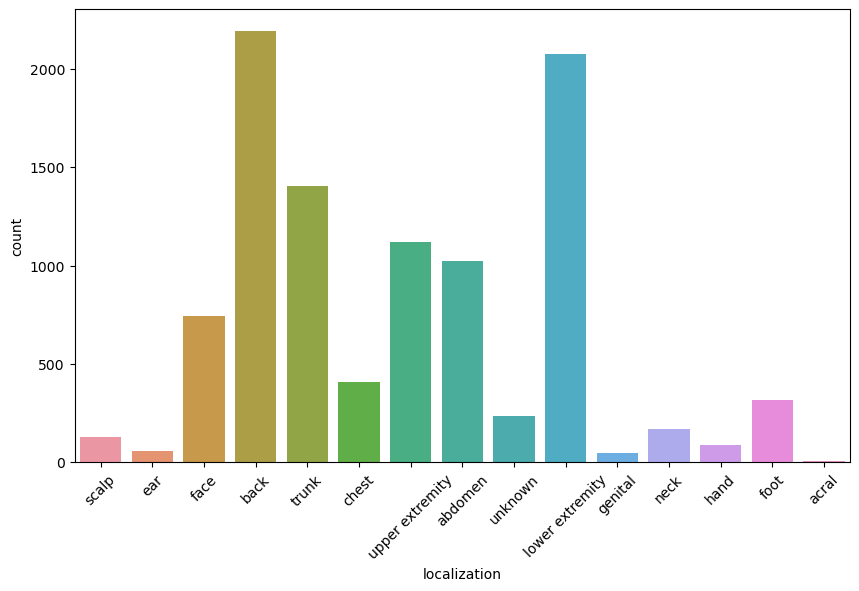

In [13]:
plt.figure(dpi=100, figsize=(10, 6))
sns.countplot(data=df, x='localization')
plt.xticks(rotation=45)
plt.show()

In [14]:
df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

##### sex

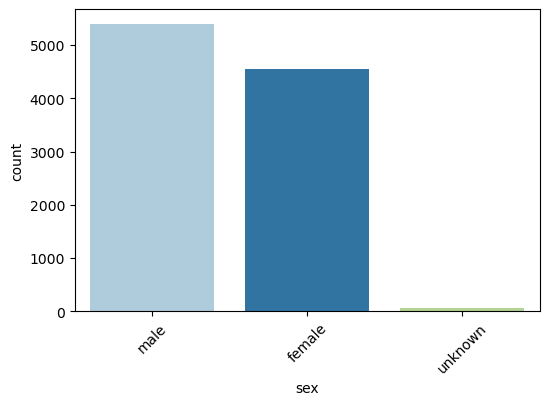

In [15]:
plt.figure(dpi=100)
sns.countplot(data=df, x='sex')
plt.xticks(rotation=45)
plt.show()

In [16]:
df['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

##### age

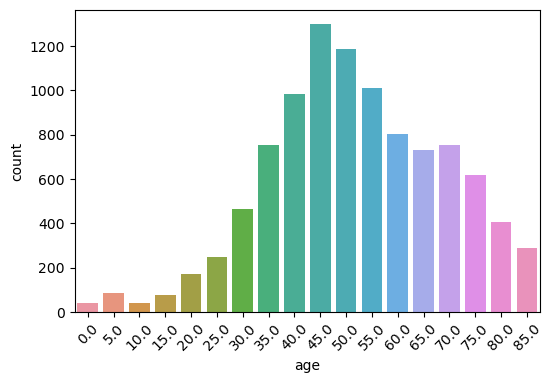

In [17]:
plt.figure(dpi=100)
sns.countplot(data=df, x='age')
plt.xticks(rotation=45)
plt.show()

In [18]:
df['age'].value_counts()

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64

In [19]:
df['age'].skew()

-0.16680239035840475

##### dx_type

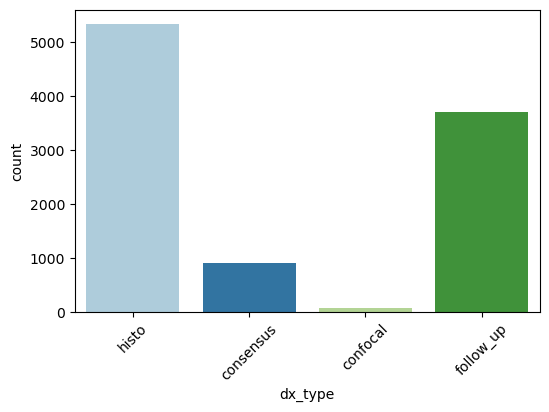

In [20]:
plt.figure(dpi=100)
sns.countplot(data=df, x='dx_type')
plt.xticks(rotation=45)
plt.show()

In [21]:
df['dx_type'].value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

### Dataset 3: [SIIM ISIC Melanoma Classification](https://www.kaggle.com/c/siim-isic-melanoma-classification)

In [22]:
data = '../../train.csv'
isic = pd.read_csv(data)

In [23]:
isic

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


##### infection region

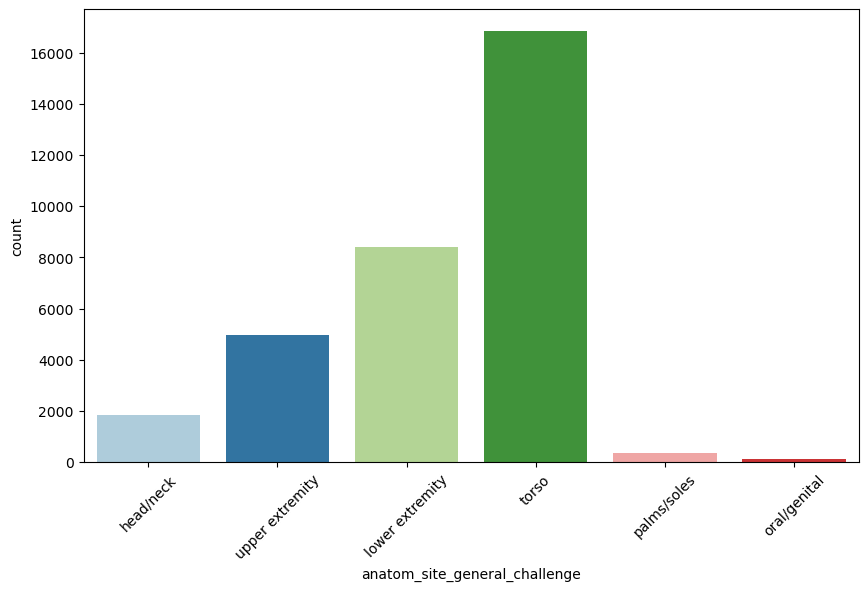

In [24]:
plt.figure(dpi=100, figsize=(10, 6))
sns.countplot(data=isic, x='anatom_site_general_challenge')
plt.xticks(rotation=45)
plt.show()

There seems to be similarities between the two datasets.  In the ISIC plot, we can see that __torso__ is most infected. Similarly, in HAM-10000 dataset, __abdomen, trunk, chest, and back__ contribute for the most locations.

##### sex

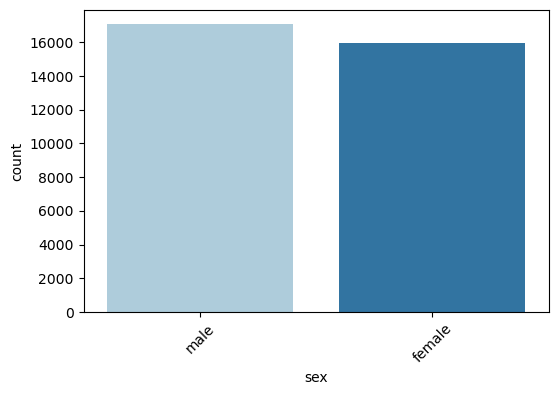

In [25]:
plt.figure(dpi=100)
sns.countplot(data=isic, x='sex')
plt.xticks(rotation=45)
plt.show()

In [26]:
isic['sex'].value_counts()

male      17080
female    15981
Name: sex, dtype: int64

##### age

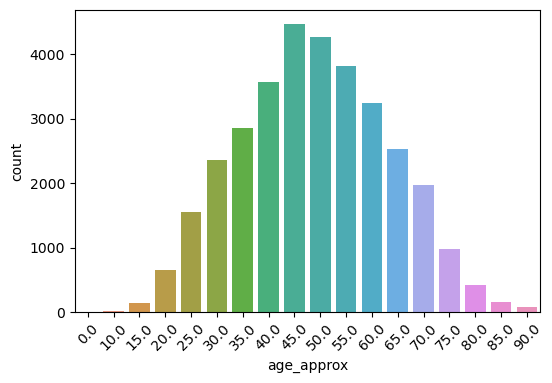

In [27]:
plt.figure(dpi=100)
sns.countplot(data=isic, x='age_approx')
plt.xticks(rotation=45)
plt.show()

In [28]:
isic['age_approx'].value_counts()

45.0    4466
50.0    4270
55.0    3824
40.0    3576
60.0    3240
35.0    2850
65.0    2527
30.0    2358
70.0    1968
25.0    1544
75.0     981
20.0     655
80.0     419
85.0     149
15.0     132
90.0      80
10.0      17
0.0        2
Name: age_approx, dtype: int64

In [29]:
isic['age_approx'].skew()

0.08074471155768628

##### benign_malignant	

In [30]:
isic['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

##### diagnosis

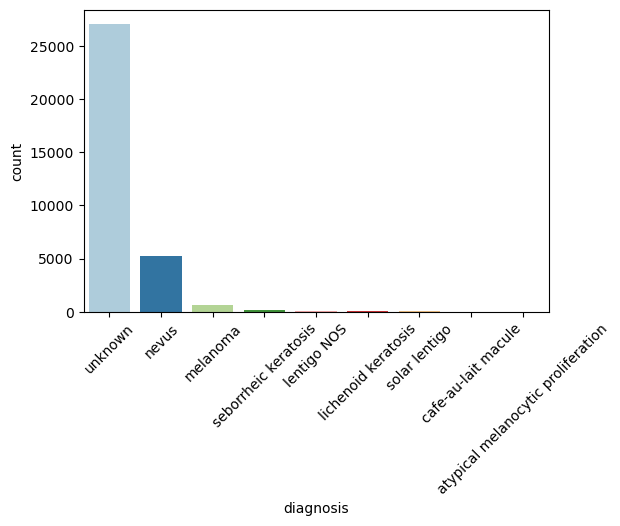

In [31]:
plt.figure(dpi=100)
sns.countplot(data=isic, x='diagnosis')
plt.xticks(rotation=45)
plt.show()

They do not seem to have recorded the type of cancer.